# Multi model comparison

In [1]:
import numpy as np
from modelskill import ModelResult, PointObservation, TrackObservation, Connector

## Define observations

In [2]:
fldr = '../tests/testdata/SW/'
o1 = PointObservation(fldr + 'HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation(fldr + "eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation(fldr + "Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define models

In [3]:
mr1 = ModelResult(fldr + 'HKZN_local_2017_DutchCoast.dfsu', name='SW_1', item=0)
mr2 = ModelResult(fldr + 'HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2', item=0)

## Connect observations and model results

In [4]:
con = Connector([o1, o2, o3], [mr1, mr2])
con

<Connector> with 
 -<PointConnector> obs=HKNA(n=564) :: 2 models=[SW_1, SW_2]
 -<PointConnector> obs=EPL(n=95) :: 2 models=[SW_1, SW_2]
 -<TrackConnector> obs=c2(n=298) :: 2 models=[SW_1, SW_2]

In [5]:
con.modelresults

{'SW_1': <DfsuModelResult> 'SW_1', 'SW_2': <DfsuModelResult> 'SW_2'}

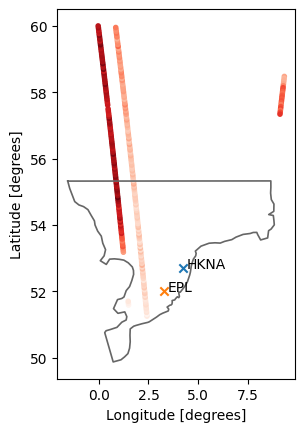

In [6]:
con.plot_observation_positions();

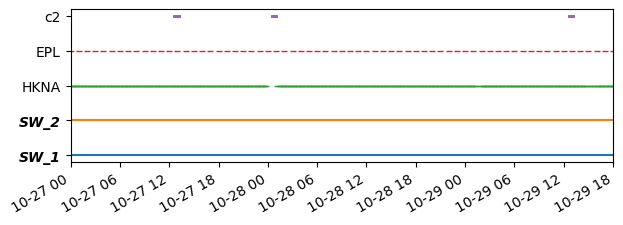

In [7]:
con.plot_temporal_coverage();

In [8]:
cc = con.extract()    # returns a collection of comparisons

/home/jan/src/modelskill/modelskill/comparison.py:401: UserWarning: no (spatial) overlap between model and observation points
  warnings.warn("no (spatial) overlap between model and observation points")
/home/jan/src/modelskill/modelskill/comparison.py:401: UserWarning: no (spatial) overlap between model and observation points
  warnings.warn("no (spatial) overlap between model and observation points")


In [9]:
cc["EPL"]   # select a single comparer from the collection like this

<PointComparer>
Quantity: Significant wave height [meter]
Observation: EPL, n_points=67
 Model: SW_1, rmse=0.224
 Model: SW_2, rmse=0.232

## Perform analysis
You can perform simple filtering on specific `observation` or specific `model`. You can refer to observations and models using their _name_ or _index_. 

The main analysis methods are:
* skill()
* mean_skill()
* scatter()
* taylor()

In [10]:
cc.skill()

n      bias      rmse     urmse       mae        cc  \
model observation                                                          
SW_1  EPL           67 -0.066597  0.223597  0.213449  0.188513  0.969846   
      HKNA         386 -0.194260  0.351964  0.293499  0.251839  0.971194   
      c2           113 -0.001210  0.351797  0.351794  0.294585  0.974335   
SW_2  EPL           67 -0.000199  0.232479  0.232479  0.198294  0.969846   
      HKNA         386 -0.100426  0.293033  0.275287  0.214422  0.971194   
      c2           113  0.081431  0.430268  0.422492  0.357138  0.974335   

                         si        r2  
model observation                      
SW_1  EPL          0.082522  0.932596  
      HKNA         0.094489  0.905300  
      c2           0.127776  0.899507  
SW_2  EPL          0.089879  0.927134  
      HKNA         0.088626  0.934358  
      c2           0.153454  0.849675

In [11]:
cc.skill(observation="c2")

,observation,n,bias,rmse,urmse,mae,cc,si,r2
model,,,,,,,,,
SW_1,c2,113,-0.001210,0.351797,0.351794,0.294585,0.974335,0.127776,0.899507
SW_2,c2,113,0.081431,0.430268,0.422492,0.357138,0.974335,0.153454,0.849675


In [12]:
cc.mean_skill(model=0, observation=[0,"c2"])

,n,bias,rmse,urmse,mae,cc,si,r2
SW_1,499,-0.097735,0.35188,0.322647,0.273212,0.972764,0.111132,0.902404


<AxesSubplot: title={'center': 'SW_1 vs Observations'}, xlabel='Significant wave height [meter]', ylabel='density'>

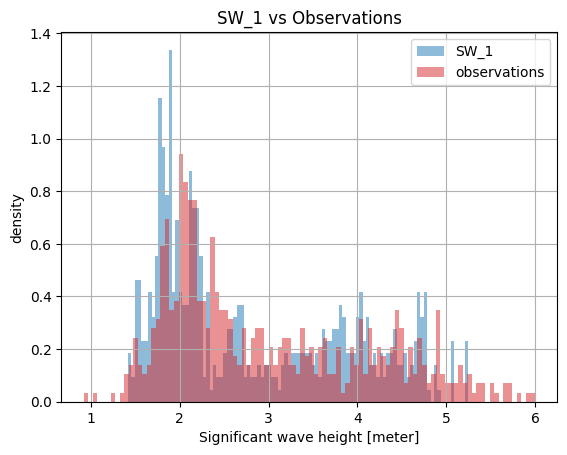

In [13]:
cc.hist()

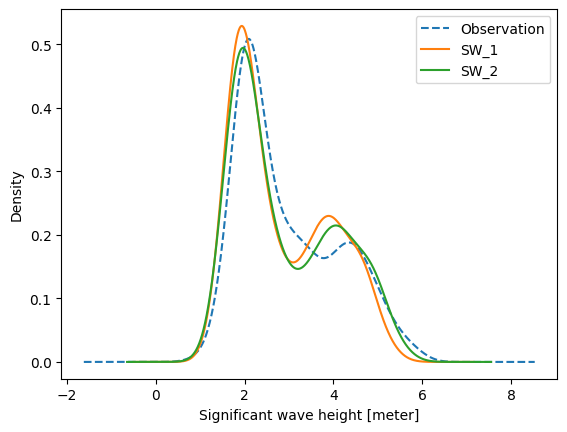

In [14]:
cc.kde();

In [ ]:
cc.scatter(model='SW_1', cmap='OrRd');

In [ ]:
cc.taylor(normalize_std=True, aggregate_observations=False)

### Time series plot (specifically for point comparisons)
If you select an comparison from the collection which is a PointComparer, you can do a time series plot

In [ ]:
cc['EPL'].plot_timeseries(figsize=(12,4));

## Filtering on time
Use the `start` and `end` arguments to do your analysis on part of the time series

In [ ]:
cc.skill(model="SW_1", end='2017-10-28')

In [ ]:
cc.scatter(model='SW_2', start='2017-10-28', cmap='OrRd', figsize=(6,7));

## Filtering on area
You can do you analysis in a specific `area` by providing a bounding box or a closed polygon

In [ ]:
bbox = np.array([0.5,52.5,5,54])
polygon = np.array([[6,51],[0,55],[0,51],[6,51]])

In [ ]:
ax = con.plot_observation_positions();
ax.plot([bbox[0],bbox[2],bbox[2],bbox[0],bbox[0]],[bbox[1],bbox[1],bbox[3],bbox[3],bbox[1]]);
ax.plot(polygon[:,0],polygon[:,1]);

In [ ]:
cc.skill(model="SW_1", area=bbox)

In [ ]:
cc.scatter(model="SW_2", area=polygon, backend='plotly')

## Skill object

The skill() and mean_skill() methods return a skill object that can visualize results in various ways. The primary methods of the skill object are:

* style()
* plot_bar()
* plot_line()
* plot_grid()
* sel()

In [ ]:
s = cc.skill()

In [ ]:
s.style()

In [ ]:
s.style(columns='rmse')

In [ ]:
s.plot_bar('rmse');

In [ ]:
s = cc.skill(by=['model','freq:12H'], metrics=['bias','rmse','si'])

In [ ]:
s.style()

In [ ]:
s.plot_line('rmse', title='Hm0 rmse [m]');

In [ ]:
s.plot_grid('si', fmt='0.1%', title='Hm0 Scatter index');

### The sel() method can subset the skill object 

A new skill object will be returned

In [ ]:
s = cc.skill()
s.style()

In [ ]:
s.sel(model='SW_1').style()

In [ ]:
s.sel(observation='HKNA').style()

In [ ]:
s.sel('rmse>0.25').style()

In [ ]:
s.sel('rmse>0.3', columns=['rmse','mae']).style()